In [1]:
# Import required lobraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('bigdatamart_Train.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.shape

(8523, 12)

array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>],
       [<AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:>]], dtype=object)

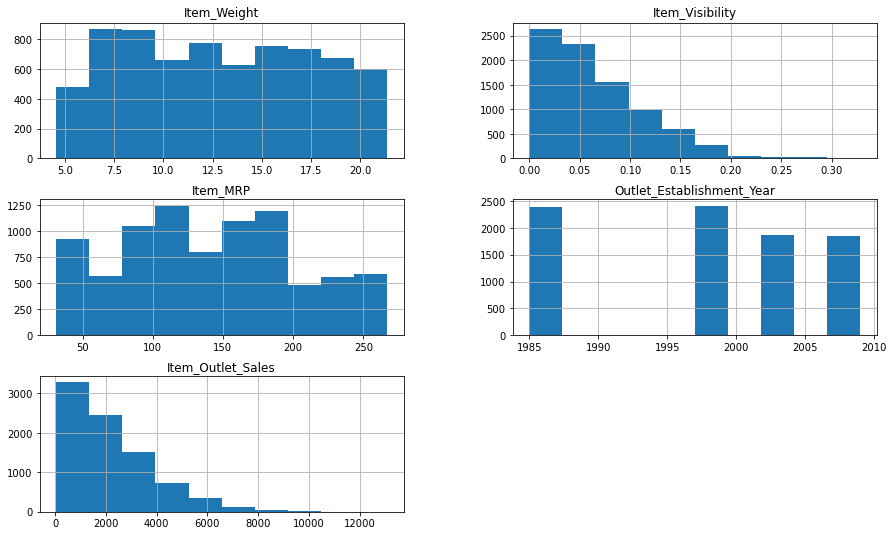

In [5]:
df.hist(figsize=(15,9))

<AxesSubplot:>

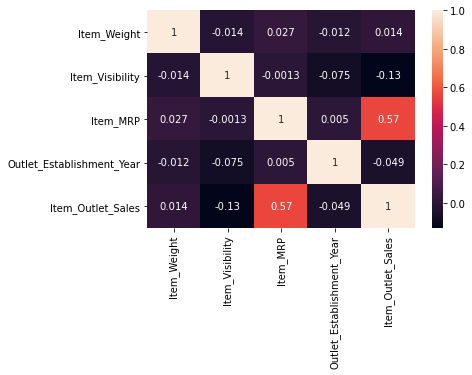

In [6]:
sns.heatmap(df.corr(),annot=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df['Outlet_Size'].mode()

0    Medium
dtype: object

In [10]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [11]:
df['Outlet_Size'].fillna('Medium', inplace=True)

In [12]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
df['Item_Weight'].median()

12.6

In [14]:
df['Item_Weight'].fillna(df['Item_Weight'].median(),inplace=True)

In [15]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [16]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [17]:
df['Item_Identifier'].nunique()

1559

In [18]:
# MEAN Encoding for Item Identifier

mean_encode=df.groupby('Item_Identifier')['Item_Outlet_Sales'].mean().to_dict()

In [19]:
df['Item_Identifier']= df['Item_Identifier'].map(mean_encode)

In [20]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,5198.067050,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,862.211000,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,1478.076000,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3021.067500,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,653.926567,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   float64
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 799.2+ KB


In [22]:
num=df.select_dtypes(np.number)

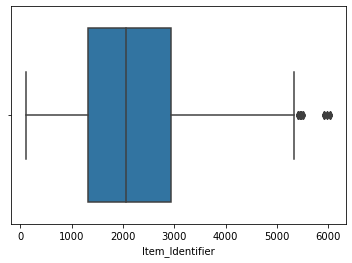

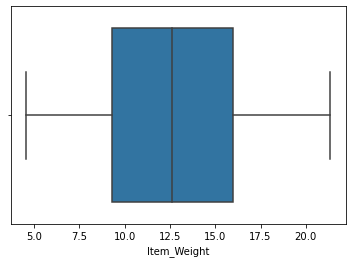

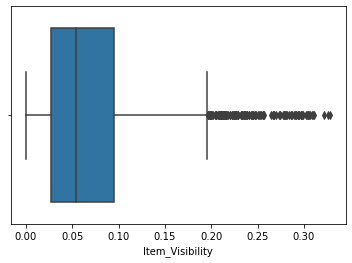

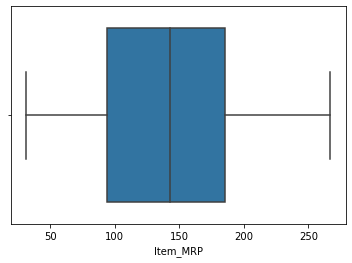

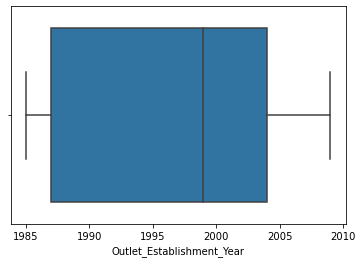

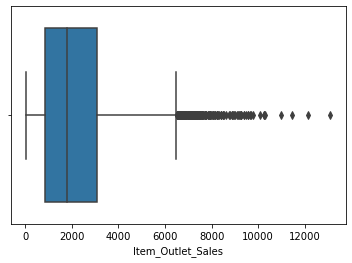

In [23]:
for i in num:
    sns.boxplot(df[i])
    plt.show()

In [24]:
IQR= df['Item_Visibility'].quantile(.75)-df['Item_Visibility'].quantile(.25)
IQR

0.067595815

In [25]:
upper= df['Item_Visibility'].quantile(.75) +( 1.5 * IQR)
upper

0.195979015

In [26]:
df['Item_Visibility']=np.where(df['Item_Visibility']>upper,upper,df['Item_Visibility'])

# Missing and outlier handle

In [27]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,5198.067050,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,862.211000,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,1478.076000,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3021.067500,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,653.926567,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [28]:
# MEan encoding for Item_Type  and Outlet_Identifier

In [29]:
d=df['Item_Type'].value_counts().to_dict()

In [30]:
df['Item_Type']=  df['Item_Type'].map(d)

In [31]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,5198.067050,9.30,Low Fat,0.016047,682,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,862.211000,5.92,Regular,0.019278,445,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,1478.076000,17.50,Low Fat,0.016760,425,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3021.067500,19.20,Regular,0.000000,1232,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,653.926567,8.93,Low Fat,0.000000,910,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [32]:
c=df['Outlet_Identifier'].value_counts().to_dict()

In [33]:
df['Outlet_Identifier']=  df['Outlet_Identifier'].map(c)

In [34]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,5198.067050,9.30,Low Fat,0.016047,682,249.8092,930,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,862.211000,5.92,Regular,0.019278,445,48.2692,928,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,1478.076000,17.50,Low Fat,0.016760,425,141.6180,930,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3021.067500,19.20,Regular,0.000000,1232,182.0950,555,1998,Medium,Tier 3,Grocery Store,732.3800
4,653.926567,8.93,Low Fat,0.000000,910,53.8614,932,1987,High,Tier 3,Supermarket Type1,994.7052


In [35]:
df['Outlet_Size']=df[['Outlet_Size']].replace({'Medium':1,'Small':0,'High':2})

In [36]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,5198.067050,9.30,Low Fat,0.016047,682,249.8092,930,1999,1,Tier 1,Supermarket Type1,3735.1380
1,862.211000,5.92,Regular,0.019278,445,48.2692,928,2009,1,Tier 3,Supermarket Type2,443.4228
2,1478.076000,17.50,Low Fat,0.016760,425,141.6180,930,1999,1,Tier 1,Supermarket Type1,2097.2700
3,3021.067500,19.20,Regular,0.000000,1232,182.0950,555,1998,1,Tier 3,Grocery Store,732.3800
4,653.926567,8.93,Low Fat,0.000000,910,53.8614,932,1987,2,Tier 3,Supermarket Type1,994.7052


In [37]:
data=pd.get_dummies(df, drop_first=True)

In [38]:
data

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,5198.067050,9.300,0.016047,682,249.8092,930,1999,1,3735.1380,1,0,0,0,0,0,1,0,0
1,862.211000,5.920,0.019278,445,48.2692,928,2009,1,443.4228,0,1,0,0,0,1,0,1,0
2,1478.076000,17.500,0.016760,425,141.6180,930,1999,1,2097.2700,1,0,0,0,0,0,1,0,0
3,3021.067500,19.200,0.000000,1232,182.0950,555,1998,1,732.3800,0,1,0,0,0,1,0,0,0
4,653.926567,8.930,0.000000,910,53.8614,932,1987,2,994.7052,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,3232.542225,6.865,0.056783,1200,214.5218,932,1987,2,2778.3834,1,0,0,0,0,1,1,0,0
8519,2636.568000,8.380,0.046982,648,108.1570,929,2002,1,549.2850,0,1,0,0,1,0,1,0,0
8520,1221.521067,10.600,0.035186,520,85.1224,930,2004,0,1193.1136,1,0,0,0,1,0,1,0,0
8521,2067.752867,7.210,0.145221,1200,103.1332,928,2009,1,1845.5976,0,1,0,0,0,1,0,1,0


In [39]:
df.skew()

Item_Identifier              0.505800
Item_Weight                  0.121845
Item_Visibility              0.813980
Item_Type                   -0.154209
Item_MRP                     0.127202
Outlet_Identifier           -2.244651
Outlet_Establishment_Year   -0.396641
Outlet_Size                  0.087072
Item_Outlet_Sales            1.177531
dtype: float64

In [40]:
X= data.drop('Item_Outlet_Sales',axis=1)
Y=data['Item_Outlet_Sales']

In [41]:
X

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,5198.067050,9.300,0.016047,682,249.8092,930,1999,1,1,0,0,0,0,0,1,0,0
1,862.211000,5.920,0.019278,445,48.2692,928,2009,1,0,1,0,0,0,1,0,1,0
2,1478.076000,17.500,0.016760,425,141.6180,930,1999,1,1,0,0,0,0,0,1,0,0
3,3021.067500,19.200,0.000000,1232,182.0950,555,1998,1,0,1,0,0,0,1,0,0,0
4,653.926567,8.930,0.000000,910,53.8614,932,1987,2,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,3232.542225,6.865,0.056783,1200,214.5218,932,1987,2,1,0,0,0,0,1,1,0,0
8519,2636.568000,8.380,0.046982,648,108.1570,929,2002,1,0,1,0,0,1,0,1,0,0
8520,1221.521067,10.600,0.035186,520,85.1224,930,2004,0,1,0,0,0,1,0,1,0,0
8521,2067.752867,7.210,0.145221,1200,103.1332,928,2009,1,0,1,0,0,0,1,0,1,0


In [42]:
from sklearn.preprocessing import power_transform
X_transformed=power_transform(X)

In [43]:
pd.DataFrame(X_transformed).skew()

0    -0.067576
1    -0.062510
2     0.121515
3    -0.197662
4    -0.115386
5    -2.186382
6    -0.200959
7    -0.073203
8    -0.395966
9     0.680513
10    8.552033
11    8.359705
12    0.738834
13    0.437995
14   -0.649203
15    2.511707
16    2.498184
dtype: float64

In [44]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X_scaled=mms.fit_transform(X_transformed)

# MAchime learning

In [45]:
# Its a Regression problem coz output variable have continuous data, sales prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

LR= LinearRegression()

In [46]:
# Train Test Split / finding best random_state for my model

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X_scaled,Y,random_state=i,test_size=.3)
    LR.fit(x_train,y_train)
    train_pred=LR.predict(x_train)
    test_pred=LR.predict(x_test)
    if round(r2_score(y_test,test_pred),3)==round(r2_score(y_train,train_pred),3):
        print("At random state ", i, "The model performance very well")
        print("At random state: ",i)
        print("Test R2 score is: ", round(r2_score(y_test,test_pred),2))
        print('Train R2 score is: ', round(r2_score(y_train,train_pred),2))
        print('X'*50,'\n')

At random state  13 The model performance very well
At random state:  13
Test R2 score is:  0.61
Train R2 score is:  0.61
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  46 The model performance very well
At random state:  46
Test R2 score is:  0.61
Train R2 score is:  0.61
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  48 The model performance very well
At random state:  48
Test R2 score is:  0.61
Train R2 score is:  0.61
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  81 The model performance very well
At random state:  81
Test R2 score is:  0.61
Train R2 score is:  0.61
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  115 The model performance very well
At random state:  115
Test R2 score is:  0.61
Train R2 score is:  0.61
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  134 The model performance very well
At random state:  134
Test R2 score is:  0.61
Train R2 score is:  0.61

In [47]:
# Lets take random state 43

x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=48,test_size=.3)
LR.fit(x_train,y_train)

LinearRegression()

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [49]:
LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()
XGB_model= XGBRegressor()
Elastic_model= ElasticNet()
SGH_model= SGDRegressor()
Bag_model=BaggingRegressor()
ADA_model=AdaBoostRegressor()
GB_model= GradientBoostingRegressor()

model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [50]:
for m in model:
    m.fit(x_train,y_train)
    print('mean_absolute_error of ',m ,'model', mean_absolute_error(y_test,m.predict(x_test)))
    print('mean_square_error of',m,'model' , mean_squared_error(y_test,m.predict(x_test)))
    print('R2 Score of',m,'model', r2_score(y_test,m.predict(x_test) )*100)
    print('X' * 50, '\n\n')

mean_absolute_error of  LinearRegression() model 795.356938977586
mean_square_error of LinearRegression() model 1162466.4442978988
R2 Score of LinearRegression() model 62.799307922067115
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Ridge() model 795.0436796504748
mean_square_error of Ridge() model 1163864.6013069954
R2 Score of Ridge() model 62.75456477388668
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Lasso() model 794.9229154120027
mean_square_error of Lasso() model 1163786.7872640963
R2 Score of Lasso() model 62.75705494146392
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  DecisionTreeRegressor() model 1037.4416443488462
mean_square_error of DecisionTreeRegressor() model 2220429.2753847656
R2 Score of DecisionTreeRegressor() model 28.94289021451659
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  SVR() model 1159.4431202661544
mean_square_error of SVR() mode

# Cross Validation

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
for i in model:
    print('mean_square of ',i, 'model',mean_squared_error(y_test,i.predict(x_test)))
    print("cross Validation score of ",i ," is ",cross_val_score(i,X,Y,cv=10, scoring='neg_mean_squared_error').mean())
    print('*'*50)

mean_square of  LinearRegression() model 1162466.4442978988
cross Validation score of  LinearRegression()  is  -1095722.5572685176
**************************************************
mean_square of  Ridge() model 1163864.6013069954
cross Validation score of  Ridge()  is  -1097123.9147539977
**************************************************
mean_square of  Lasso() model 1163786.7872640963
cross Validation score of  Lasso()  is  -1096887.8620706475
**************************************************
mean_square of  DecisionTreeRegressor() model 2220429.2753847656
cross Validation score of  DecisionTreeRegressor()  is  -2164435.6683925344
**************************************************
mean_square of  SVR() model 2506769.929074795
cross Validation score of  SVR()  is  -2196429.4069521665
**************************************************
mean_square of  KNeighborsRegressor() model 1583467.0694286334
cross Validation score of  KNeighborsRegressor()  is  -1559532.2397824083
**************

In [53]:
for i in model:
    print('Root mean_square of ',i, 'model',np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
    score=cross_val_score(i,X,Y,cv=10, scoring='neg_mean_squared_error').mean()
    print("cross Validation score of root mean square ",i ," is ",np.sqrt(-score))
    print('*'*50)

Root mean_square of  LinearRegression() model 1078.1773714458575
cross Validation score of root mean square  LinearRegression()  is  1046.7676711040122
**************************************************
Root mean_square of  Ridge() model 1078.8255657459158
cross Validation score of root mean square  Ridge()  is  1047.4368309134436
**************************************************
Root mean_square of  Lasso() model 1078.7895009055735
cross Validation score of root mean square  Lasso()  is  1047.3241437447375
**************************************************
Root mean_square of  DecisionTreeRegressor() model 1490.1104909988271
cross Validation score of root mean square  DecisionTreeRegressor()  is  1474.7915476967635
**************************************************
Root mean_square of  SVR() model 1583.2782222574765
cross Validation score of root mean square  SVR()  is  1482.035561972845
**************************************************
Root mean_square of  KNeighborsRegressor() mod

# Square Root mean_square (SRME) of  GradientBoostingRegressor() model 1034.582330775297
cross Validation score of RMSE  GradientBoostingRegressor()  is  1001.7932643272118

In [54]:
# Gradient Boosting Regressor has least SMSE  and smallest difference with CV

# Lets do Hypertune this

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
param=[{'n_estimators': [100,200,400,600],
       'learning_rate':[.01,.03,.07,.09,.1,.2,.5,.9],
        'max_depth': [10, 64, 118, 173, 227],
        'min_samples_split': [1,2,3,5,9,13],
        'max_features': ['auto','sqrt','log2']
       }]

In [58]:
GS=GridSearchCV(GB_model,param,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
#GS.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid=[{'learning_rate': [0.01, 0.03, 0.07, 0.09, 0.1, 0.2,
                                            0.5, 0.9],
                          'max_depth': [10, 64, 118, 173, 227],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'min_samples_split': [1, 2, 3, 5, 9, 13],
                          'n_estimators': [100, 200, 400, 600]}],
             scoring='neg_mean_squared_error')

In [61]:
GS.best_estimator_

GradientBoostingRegressor(learning_rate=0.03, max_depth=10, max_features='log2',
                          min_samples_split=9)

In [62]:
GS.best_params_

{'learning_rate': 0.03,
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_split': 9,
 'n_estimators': 100}

In [64]:
GS_predict=GS.best_estimator_.predict(x_test)

In [65]:
print('Root mean_square of Hypertuned model is ',np.sqrt(mean_squared_error(y_test,GS_predict)))

Root mean_square of Hypertuned model is  1064.0530620283198


# Save the Model

In [66]:
import joblib

In [ ]:
# joblib.dump(   GB_model ,'Big-Data-Mart-Sales-Problem.pkl')

# Adaboost

In [59]:
param=[{'n_estimators': [50,100,150,200,250,300],
       'learning_rate':[.001,.003,.07,.09,.1,.2,.4,1],
        'algorithm': ['SAMME','SAMME.R'],
        
       }]

In [60]:
GS_ada=GridSearchCV(ADA_model,param,cv=10,scoring='neg_mean_squared_errn_jobs=',n_jobs=-1)
#GS.fit(x_train,y_train)

KeyboardInterrupt: 